In [35]:
# <1> 
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# <2>
# load the 2017-2018 school year file "MERGED2017_18_PP.csv" 
# Don't include all columns - too many and take up computer resources (computeing power and memory)
# Only load the following 10 columns should be loaded:
# UNITID: 
# OPEID:              
# OPEID6:            
# INSTNM:          
# CITY:                      
# ZIP:               
# ADM_RATE:           
# UGDS:              
# TUITIONFEE_IN:      

column_list = ["UNITID", 'OPEID','OPEID6','INSTNM','CITY','ZIP','ADM_RATE','UGDS','TUITIONFEE_IN']
df1 = pd.read_csv("C:/Users/kathu/Documents/UMBC/DATA 690/MERGED2017_18_PP.csv", usecols=column_list)

print(df1.head())
print(df1.shape)
print(df1.size)

   UNITID    OPEID  OPEID6                               INSTNM        CITY  \
0  100654   100200    1002             Alabama A & M University      Normal   
1  100663   105200    1052  University of Alabama at Birmingham  Birmingham   
2  100690  2503400   25034                   Amridge University  Montgomery   
3  100706   105500    1055  University of Alabama in Huntsville  Huntsville   
4  100724   100500    1005             Alabama State University  Montgomery   

          ZIP  ADM_RATE     UGDS  TUITIONFEE_IN  
0       35762    0.9027   4824.0         9857.0  
1  35294-0110    0.9181  12866.0         8328.0  
2  36117-3553       NaN    322.0         6900.0  
3       35899    0.8123   6917.0        10280.0  
4  36104-0271    0.9787   4189.0        11068.0  
(7115, 9)
64035


In [37]:
# <3>
# Load the scorecard file Most-Recent-Cohorts-Scorecard-Elements.csv from the link:
# https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv
# This file has thre median earnings which is not present in the previous file
# Only load the two columns:
# UNITID - This column is the unique identity for each college and will be used to join with the previous file
# MD_EARN_WNE_P10  - This column has the median earnings
col_list2=['UNITID','MD_EARN_WNE_P10']
df2=pd.read_csv("Most-Recent-Cohorts-Scorecard-Elements.csv", usecols=col_list2)
df2.head()

,UNITID,MD_EARN_WNE_P10
0,100654,31000
1,100663,41200
2,100690,39600
3,100706,46700
4,100724,27700


In [38]:
# <4> 
# Explore this file - number of colleges, head/tail/sample etc.
# Notice this file has different number of colleges from the previous file
# This indicate they are not identical and they overlap (they don't contain the same set of colleges)
print("tail of df2", df2.tail())
print("head of df2", df2.head())
print("shape of df2", df2.shape)
print("size of df2", df2.size)
print("Shape of other dataset - df1", df1.shape)
print("Size of df", df1.size)

tail of df2         UNITID MD_EARN_WNE_P10
7110  48312404             NaN
7111  48387801             NaN
7112  48400201             NaN
7113  48778201             NaN
7114  49005401             NaN
head of df2    UNITID MD_EARN_WNE_P10
0  100654           31000
1  100663           41200
2  100690           39600
3  100706           46700
4  100724           27700
shape of df2 (7115, 2)
size of df2 14230
Shape of other dataset - df1 (7115, 9)
Size of df 64035


In [39]:
# <5>
#Join the two files together to produce a third file which contain all the columns and all colleges that are common to both files
df = pd.merge(df1, df2, on = 'UNITID', how = 'inner')
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0,31000
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0,41200
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0,39600
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0,46700
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0,27700


In [40]:
# <6>
# Explore the new file
df.describe()

,UNITID,OPEID,OPEID6,ADM_RATE,UGDS,TUITIONFEE_IN
count,7.115000e+03,7.115000e+03,7115.000000,2037.000000,6367.000000,4028.000000
mean,1.866527e+06,1.866251e+06,16751.034575,0.681822,2426.058426,15081.399950
std,6.957330e+06,3.314636e+06,14587.760414,0.212179,5481.326798,12723.724262
min,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,0.000000
25%,1.740965e+05,3.230500e+05,3225.000000,0.550000,106.000000,5246.250000
50%,2.290270e+05,1.055400e+06,10542.000000,0.707600,401.000000,11296.000000
75%,4.506095e+05,3.025700e+06,30106.000000,0.838400,2018.000000,19400.000000
max,4.900540e+07,8.209884e+07,42698.000000,1.000000,77269.000000,74514.000000


In [41]:
df['MD_EARN_WNE_P10'].describe()

count                  5890
unique                  635
top       PrivacySuppressed
freq                    712
Name: MD_EARN_WNE_P10, dtype: object

In [44]:
# For future histograms/analysis - I need to do some cleaning and make values numeric

In [45]:
df = df[df['MD_EARN_WNE_P10']!= 'PrivacySuppressed']
df['MD_EARN_WNE_P10'].describe()

count      5178
unique      634
top       45900
freq         80
Name: MD_EARN_WNE_P10, dtype: object

In [46]:
df['MD_EARN_WNE_P10'] = pd.to_numeric(df['MD_EARN_WNE_P10'],errors='coerce')

In [47]:
df['MD_EARN_WNE_P10'].describe()

count      5178.00000
mean      35168.01854
std       15812.93341
min       10800.00000
25%       25400.00000
50%       32600.00000
75%       41900.00000
max      250000.00000
Name: MD_EARN_WNE_P10, dtype: float64

In [48]:
df.describe()

,UNITID,OPEID,OPEID6,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
count,6.403000e+03,6.403000e+03,6403.000000,1905.000000,5710.000000,3832.000000,5178.00000
mean,1.920015e+06,1.757081e+06,15446.778385,0.675821,2658.027320,15187.968946,35168.01854
std,7.001407e+06,3.450334e+06,14177.077315,0.210356,5711.950105,12837.013473,15812.93341
min,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,0.000000,10800.00000
25%,1.714695e+05,3.032500e+05,3025.500000,0.545200,126.250000,5178.250000,25400.00000
50%,2.245450e+05,9.479000e+05,9466.000000,0.702200,521.500000,11376.000000,32600.00000
75%,4.509875e+05,2.559311e+06,25458.500000,0.832900,2300.750000,19739.250000,41900.00000
max,4.900540e+07,8.209884e+07,42698.000000,1.000000,77269.000000,57208.000000,250000.00000


In [49]:
df['MD_EARN_WNE_P10'].isna().sum()

1225

In [50]:
df["MD_EARN_WNE_P10"].dropna(inplace=True)

In [51]:
df["MD_EARN_WNE_P10"].isna().sum()

0

In [52]:
# Now onto tuition

In [53]:
df['TUITIONFEE_IN'].describe()

count     3832.000000
mean     15187.968946
std      12837.013473
min          0.000000
25%       5178.250000
50%      11376.000000
75%      19739.250000
max      57208.000000
Name: TUITIONFEE_IN, dtype: float64

In [54]:
df['TUITIONFEE_IN'].isna().sum()

2571

In [55]:
df["TUITIONFEE_IN"].dropna(inplace=True)

In [56]:
df['TUITIONFEE_IN'].isna().sum()

0

In [60]:
# Now onto adm rates
df.sort_values("ADM_RATE")
df.head(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
5226,448309,159101,1591,Shorter University-College of Adult & Professi...,Rome,30165,0.0000,113.0,9680.0,43200.0
6667,491288,389600,3896,University of Wisconsin-Milwaukee Flex,Milwaukee,53201,0.0000,501.0,6750.0,NaN
6115,480912,4219700,42197,Gemini School of Visual Arts & Communication,Cedar Park,78613,0.0000,18.0,NaN,NaN
2974,211635,653400,6534,Citizens School of Nursing,New Kensington,15068-6525,0.0000,158.0,NaN,57500.0
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000.0


In [61]:
df.isna().sum()

UNITID                0
OPEID                 0
OPEID6                0
INSTNM                0
CITY                  0
ZIP                   0
ADM_RATE           4498
UGDS                693
TUITIONFEE_IN      2571
MD_EARN_WNE_P10    1225
dtype: int64

In [62]:
df.dropna(inplace = True)

In [63]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
5226,448309,159101,1591,Shorter University-College of Adult & Professi...,Rome,30165,0.0000,113.0,9680.0,43200.0
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000.0
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700.0
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800.0
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700.0


In [64]:
# Okay so a lot of these are 0 which isn't realistic... gotta fix this

df = df[df['ADM_RATE']>0]
df.head(10)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000.0
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700.0
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800.0
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700.0
2233,190150,270700,2707,Columbia University in the City of New York,New York,10027,0.0661,8170.0,57208.0,83300.0
633,130794,142600,1426,Yale University,New Haven,06520,0.0693,5742.0,51400.0,83200.0
1575,166683,217800,2178,Massachusetts Institute of Technology,Cambridge,02139-4307,0.0717,4489.0,49892.0,104700.0
212,110404,113100,1131,California Institute of Technology,Pasadena,91125,0.0774,961.0,49908.0,85900.0
427,121345,117300,1173,Pomona College,Claremont,91711-6319,0.0836,1567.0,51075.0,58100.0
3189,217156,340100,3401,Brown University,Providence,02912,0.0849,6670.0,53419.0,67500.0


In [65]:
df['ADM_RATE'].isna().sum()

0

In [66]:
df.isna().sum()

UNITID             0
OPEID              0
OPEID6             0
INSTNM             0
CITY               0
ZIP                0
ADM_RATE           0
UGDS               0
TUITIONFEE_IN      0
MD_EARN_WNE_P10    0
dtype: int64

In [67]:
# <7>
# Find out the top 100 colleges that are hardest to get in (Top 100) from this new file
df100 = df.head(100)
df100.head(20)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000.0
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700.0
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800.0
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700.0
2233,190150,270700,2707,Columbia University in the City of New York,New York,10027,0.0661,8170.0,57208.0,83300.0
633,130794,142600,1426,Yale University,New Haven,06520,0.0693,5742.0,51400.0,83200.0
1575,166683,217800,2178,Massachusetts Institute of Technology,Cambridge,02139-4307,0.0717,4489.0,49892.0,104700.0
212,110404,113100,1131,California Institute of Technology,Pasadena,91125,0.0774,961.0,49908.0,85900.0
427,121345,117300,1173,Pomona College,Claremont,91711-6319,0.0836,1567.0,51075.0,58100.0
3189,217156,340100,3401,Brown University,Providence,02912,0.0849,6670.0,53419.0,67500.0


In [69]:
df100.head(100)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000.0
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700.0
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800.0
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700.0
2233,190150,270700,2707,Columbia University in the City of New York,New York,10027,0.0661,8170.0,57208.0,83300.0
633,130794,142600,1426,Yale University,New Haven,06520,0.0693,5742.0,51400.0,83200.0
1575,166683,217800,2178,Massachusetts Institute of Technology,Cambridge,02139-4307,0.0717,4489.0,49892.0,104700.0
212,110404,113100,1131,California Institute of Technology,Pasadena,91125,0.0774,961.0,49908.0,85900.0
427,121345,117300,1173,Pomona College,Claremont,91711-6319,0.0836,1567.0,51075.0,58100.0
3189,217156,340100,3401,Brown University,Providence,02912,0.0849,6670.0,53419.0,67500.0


In [70]:
df100.isna().sum()

UNITID             0
OPEID              0
OPEID6             0
INSTNM             0
CITY               0
ZIP                0
ADM_RATE           0
UGDS               0
TUITIONFEE_IN      0
MD_EARN_WNE_P10    0
dtype: int64

In [71]:
# <8>
# Display the summary statistics of the in-state tuitions of the top 100 colleges that are hardest to get in
df100['TUITIONFEE_IN'].describe()

count      100.000000
mean     37579.700000
std      18368.610418
min       1020.000000
25%      16918.250000
50%      49640.500000
75%      52666.000000
max      57208.000000
Name: TUITIONFEE_IN, dtype: float64

(array([ 1.,  0.,  0.,  0.,  1.,  4.,  0.,  2.,  2.,  2.,  5.,  4.,  3.,
         0.,  3.,  0.,  4.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
         2.,  1.,  3.,  1.,  9.,  9., 11., 14.,  7.,  2.,  1.]),
 array([ 1020.  ,  2143.76,  3267.52,  4391.28,  5515.04,  6638.8 ,
         7762.56,  8886.32, 10010.08, 11133.84, 12257.6 , 13381.36,
        14505.12, 15628.88, 16752.64, 17876.4 , 19000.16, 20123.92,
        21247.68, 22371.44, 23495.2 , 24618.96, 25742.72, 26866.48,
        27990.24, 29114.  , 30237.76, 31361.52, 32485.28, 33609.04,
        34732.8 , 35856.56, 36980.32, 38104.08, 39227.84, 40351.6 ,
        41475.36, 42599.12, 43722.88, 44846.64, 45970.4 , 47094.16,
        48217.92, 49341.68, 50465.44, 51589.2 , 52712.96, 53836.72,
        54960.48, 56084.24, 57208.  ]),
 <a list of 50 Patch objects>)

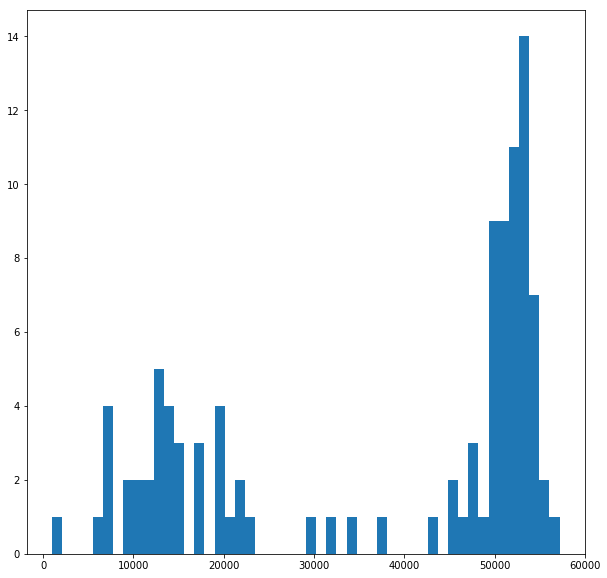

In [73]:
# <9>
# Display the histogram of the in-state tuitions of the top 100 colleges that are hardest to get in
top100_in_state_tuition = df100[['INSTNM','TUITIONFEE_IN']]


fig, ax = plt.subplots(figsize=(10,10))
ax.hist(x=top100_in_state_tuition['TUITIONFEE_IN'], bins=50)

In [74]:
# <10>
# Display the summary statistics of the earning potentials of the top 100 colleges that are hardest to get in
df100['MD_EARN_WNE_P10'].describe()

count       100.000000
mean      59239.000000
std       19127.772896
min       23500.000000
25%       45150.000000
50%       60700.000000
75%       71325.000000
max      104700.000000
Name: MD_EARN_WNE_P10, dtype: float64

(array([1., 0., 4., 4., 1., 4., 2., 2., 4., 1., 0., 0., 2., 1., 0., 3., 3.,
        0., 1., 4., 2., 8., 5., 4., 4., 6., 1., 4., 3., 1., 2., 2., 3., 2.,
        1., 1., 2., 2., 2., 1., 2., 1., 0., 2., 1., 0., 0., 0., 0., 1.]),
 array([ 23500.,  25124.,  26748.,  28372.,  29996.,  31620.,  33244.,
         34868.,  36492.,  38116.,  39740.,  41364.,  42988.,  44612.,
         46236.,  47860.,  49484.,  51108.,  52732.,  54356.,  55980.,
         57604.,  59228.,  60852.,  62476.,  64100.,  65724.,  67348.,
         68972.,  70596.,  72220.,  73844.,  75468.,  77092.,  78716.,
         80340.,  81964.,  83588.,  85212.,  86836.,  88460.,  90084.,
         91708.,  93332.,  94956.,  96580.,  98204.,  99828., 101452.,
        103076., 104700.]),
 <a list of 50 Patch objects>)

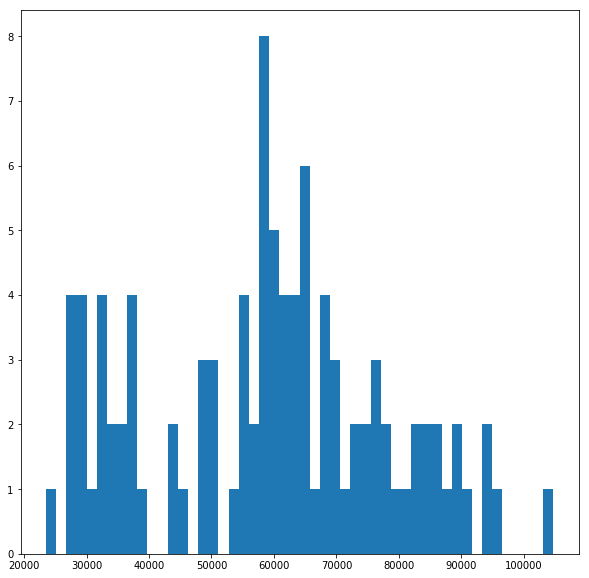

In [75]:
# <11>
# Display the histogram of the earning potentials of the top 100 colleges that are hardest to get in
top100_earning_potentials = df100[['INSTNM','MD_EARN_WNE_P10']]


fig, ax = plt.subplots(figsize=(10,10))
ax.hist(x=top100_earning_potentials['MD_EARN_WNE_P10'], bins=50)

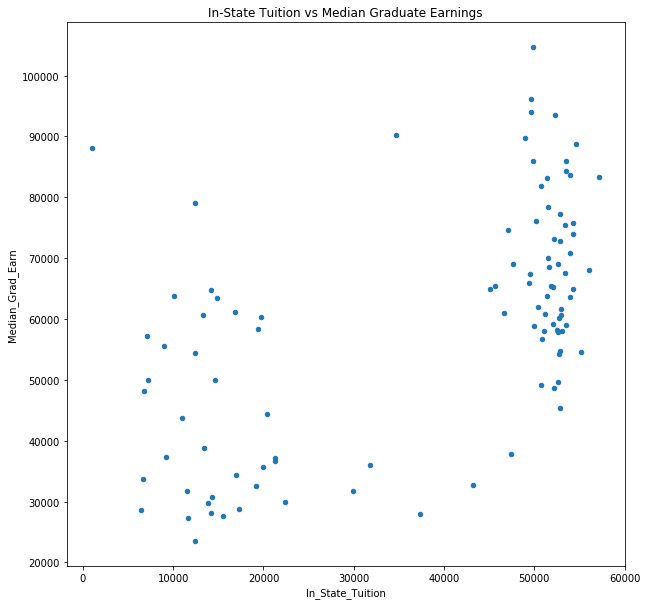

In [76]:
# <12>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Pandas
Data = {'In_State_Tuition':df100['TUITIONFEE_IN'],
       'Median_Grad_Earn':df100['MD_EARN_WNE_P10']}
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("In-State Tuition vs Median Graduate Earnings")
ax.grid(True)
df_scatter = pd.DataFrame(Data, columns=["In_State_Tuition","Median_Grad_Earn"])
df_scatter.plot.scatter(x='In_State_Tuition', y='Median_Grad_Earn', ax=ax)

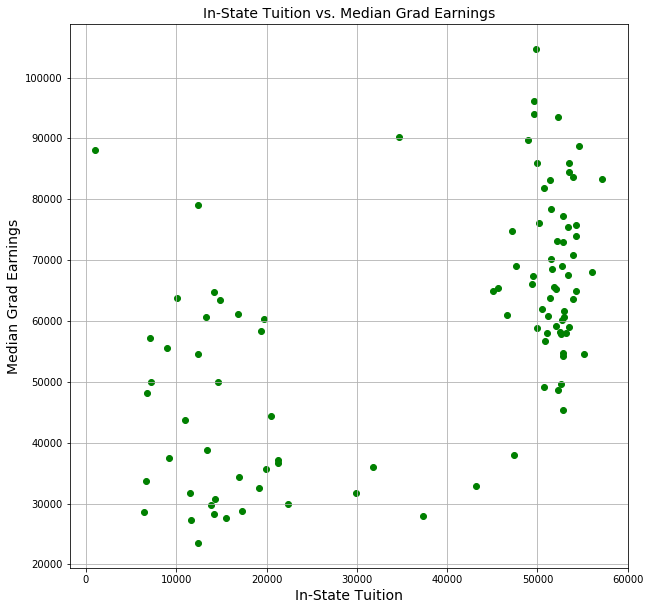

In [77]:
# <13>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Matplotlib

In_State_Tuition = df100["TUITIONFEE_IN"]
Med_Grad_Earn = df100["MD_EARN_WNE_P10"]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(In_State_Tuition, Med_Grad_Earn, color='green')
ax.set_title("In-State Tuition vs. Median Grad Earnings", fontsize=14)
ax.set_xlabel("In-State Tuition", fontsize=14)
ax.set_ylabel("Median Grad Earnings", fontsize=14)
ax.grid(True)

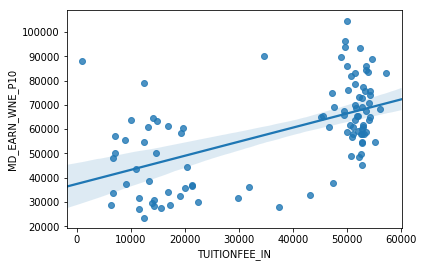

In [79]:
# <14>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Seaborn
#With regression fit
sns.regplot(x=df100['TUITIONFEE_IN'], y=df100['MD_EARN_WNE_P10'])

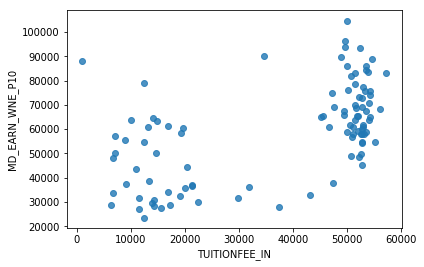

In [80]:
# Without regression fit
sns.regplot(x=df100['TUITIONFEE_IN'], y=df100['MD_EARN_WNE_P10'], fit_reg=False)

In [ ]:
# <15> 
# Your observation/conclusion of the scatter plot (use the following Markdown cell)

#### Based on my observation of the scatter plot, schools with higher in-state tuition have graduates with higher median earnings. However, it is not a direct correlation, as there are enough schools with lower in-state tuition that have similar graduate earnings to schools with high in-state tuition. Schools with tuition fees in between seem to have lower graduate earnings. The two variables may be related, but more statistical analysis would need to be done to determine significance, and how they are. 
Assuming they are related, just by looking at the plots, one might predict the two variables may be positively related (as tuition increases, median graduate earnings increase).
